## OBS Data Analysis from "Zu nah?" project at TH Wildau
based on open data ressources only

created by Simon Metzler at Radprofessur Wildau 

* project page https://innohub13.de/wir-forschen/zu-nah/ 
* page of Radprofessur https://www.th-wildau.de/radverkehr

---

### Index: 
* [import python packages](#import) 
* [parse data](#parse)
* [Geo overview](#geo) 
* [pre processing data](#pre) 
* [plot histogram](#histo) 
* [plot time based analysis](#time) 

---
<a id="import">import python packages<a> 

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
#from matplotlib_scalebar.scalebar import ScaleBar
import contextily as ctx

In [4]:
import seaborn as sns
import matplotlib.ticker as ticker


---
<a id="parse">parse data<a> 

In [5]:
# manual downlaod from export-tab (automatic download is possible yet not encouraged)
#https://obs.adfc-brandenburg.de/
#https://obs.adfc-bw.de/
#https://obs.radentscheid-essen.de/
#https://portal.openbikesensor.org/
#https://obs.adfc-darmstadt.de/

# Stand 07.11.22

files = glob.glob(r'portale\*.geojson')

len(files)

6

In [6]:
gdf =gpd.GeoDataFrame()

for f in tqdm(files):
    gdf_this = gpd.read_file(f, crs='EPSG:4326')
    portal_name=f.split('_')[-1].replace('.geojson','')
    gdf_this['portal']= portal_name

    gdf=gdf.append(gdf_this)
    
    print (portal_name)
    print (len(gdf_this))

 17%|██████████████                                                                      | 1/6 [00:00<00:04,  1.01it/s]

bbb
15523


 33%|████████████████████████████                                                        | 2/6 [00:02<00:04,  1.13s/it]

bw
20209


 50%|██████████████████████████████████████████                                          | 3/6 [00:03<00:03,  1.12s/it]

darmstadt
18420


 67%|████████████████████████████████████████████████████████                            | 4/6 [00:04<00:01,  1.04it/s]

essen
11480


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.10s/it]

obs-portal
40722
os
2107


In [7]:
gdf

,distance_overtaker,distance_stationary,direction,way_id,course,speed,time,geometry,portal
0,1.82,NaN,-1,28496022.0,1.913791,4.611111,2022-05-09 15:22:33+00:00,POINT (13.42786 52.47392),bbb
1,0.71,NaN,-1,28496022.0,1.927347,1.666667,2022-05-09 15:22:48+00:00,POINT (13.42766 52.47430),bbb
2,1.57,0.50,-1,849599088.0,1.934648,4.500000,2022-05-09 15:23:26+00:00,POINT (13.42738 52.47485),bbb
3,1.26,0.74,-1,568336446.0,1.878984,4.138889,2022-05-09 15:23:33+00:00,POINT (13.42746 52.47528),bbb
4,2.05,NaN,-1,816236476.0,2.021442,4.083333,2022-05-09 15:23:44+00:00,POINT (13.42769 52.47581),bbb
...,...,...,...,...,...,...,...,...,...
2102,1.29,2.41,1,93245513.0,0.794396,3.916667,2022-11-01 05:42:58+00:00,POINT (8.00970 52.26666),os
2103,1.69,NaN,1,93245513.0,0.721962,2.361111,2022-11-01 05:43:05+00:00,POINT (8.01000 52.26678),os
2104,1.39,NaN,1,93245513.0,0.536645,2.138889,2022-11-01 05:43:08+00:00,POINT (8.01010 52.26682),os
2105,1.52,NaN,1,93245513.0,0.930771,2.750000,2022-11-01 05:43:16+00:00,POINT (8.01051 52.26698),os


---
<a id="geo">Geo overview<a> 

<AxesSubplot:>

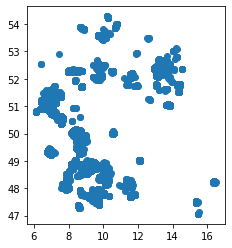

In [8]:
gdf.plot()

<AxesSubplot:>

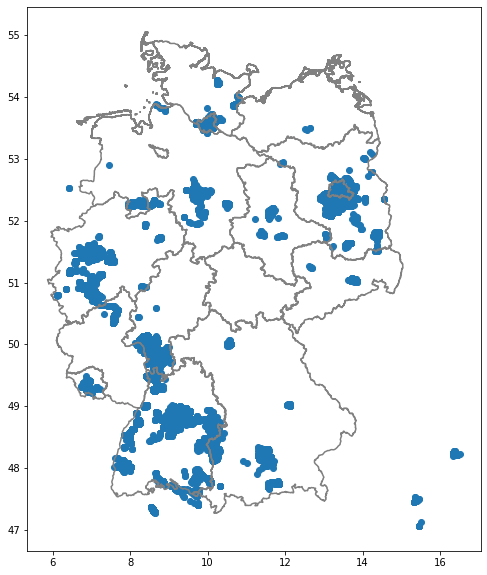

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax)

bland = gpd.read_file("https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/1_sehr_hoch.geo.json")
bland.boundary.plot(ax=ax, color='gray')

<AxesSubplot:>

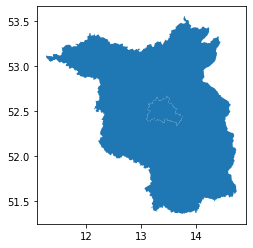

In [10]:
bbb=bland[bland.name.isin(['Brandenburg','Berlin'])]#.dissolve()
bbb.plot()

In [11]:
# clip geografically all meassueres from bbb
gdf_clipped=gdf.clip(bbb)

## alternativly filter by portal e.g.
#gdf_filtered=gdf[gdf.portal=='bbb']

In [12]:
gdf_clipped

,distance_overtaker,distance_stationary,direction,way_id,course,speed,time,geometry,portal
9911,0.60,NaN,-1,39624415.0,2.961233,5.111111,2022-09-09 14:32:10+00:00,POINT (14.34543 51.51476),bbb
6777,1.68,NaN,-1,999880944.0,3.475565,4.555556,2022-08-23 05:23:16+00:00,POINT (13.69015 51.63364),bbb
5567,2.12,NaN,1,999880944.0,0.304145,4.083333,2022-08-18 15:11:09+00:00,POINT (13.69064 51.63369),bbb
6802,1.56,NaN,1,48869301.0,0.173665,4.638889,2022-08-23 15:09:37+00:00,POINT (13.69265 51.63397),bbb
5914,1.36,NaN,-1,15404302.0,2.837079,5.861111,2022-08-22 11:32:16+00:00,POINT (13.54767 51.56413),bbb
...,...,...,...,...,...,...,...,...,...
15005,1.04,NaN,-1,246509766.0,4.735163,2.888889,2022-10-23 11:55:35+00:00,POINT (13.04605 52.44711),bbb
3273,2.24,NaN,1,269437458.0,1.710760,4.694444,2022-08-07 12:50:39+00:00,POINT (11.87009 52.91371),bbb
3274,1.42,NaN,1,42075595.0,0.716848,3.888889,2022-08-07 13:54:00+00:00,POINT (11.90584 52.93102),bbb
3275,0.83,NaN,-1,25486949.0,6.183428,4.555556,2022-08-07 14:03:39+00:00,POINT (11.93233 52.94099),bbb


In [13]:
gdf_clipped.portal.value_counts()

bbb           15501
obs-portal      811
Name: portal, dtype: int64

#### BRANDENBURG

In [14]:
# Function
def makeLayeredMap(*args):
    """This function accepts an arbitrary number of geodataframes, plots them on top of a Contextily basemap. 
    NOTE: Please edit the Plotting-section to specify parameters for the number of layers and the formatting of each layer.
    Output: Saved file and layered map for display."""
    
    # Convert the CRS for all layers to EPSG3857 to match Contextily
    args = list(map(lambda x: x.to_crs(epsg=3857), args))
    # Create figure
    fig, ax = plt.subplots(1, figsize=(15, 15))
    #Set aspect to equal
    ax.set_aspect('equal')
    
    # PLOTTING: Specify layers to plot how to format each layer (colours, transparency, etc.):
    # Layer 1:
    args[0].plot(ax=ax,facecolor="grey", alpha=0.3, figsize=(15,15))
    args[0].plot(ax=ax,facecolor="none", alpha=1, edgecolor='black', linewidths=1, figsize=(15,15))
    # Layer 2:
    args[1].plot(ax=ax, color='#0069B4', alpha=0.3, zorder=2, markersize=5)

    #ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron) 
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, reset_extent=False, zoom = 10) 
        
    # Turn off axis
    ax.axis('off')

    
    #add overall title
    ax.text(x=0.5, y=0.955, s='Measured overtaking events', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
    ax.text(x=0.5, y=0.925, s="OBS-Data: ADFC Brandenburg :  (n=" + str(len(args[1])) + ", 2022-11-07)", fontsize=15, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
    layered_map = plt.show()

    #fig.savefig("plots\OBS_analysis_map_bbb_80dpi.png", dpi=80) 
    return(layered_map)

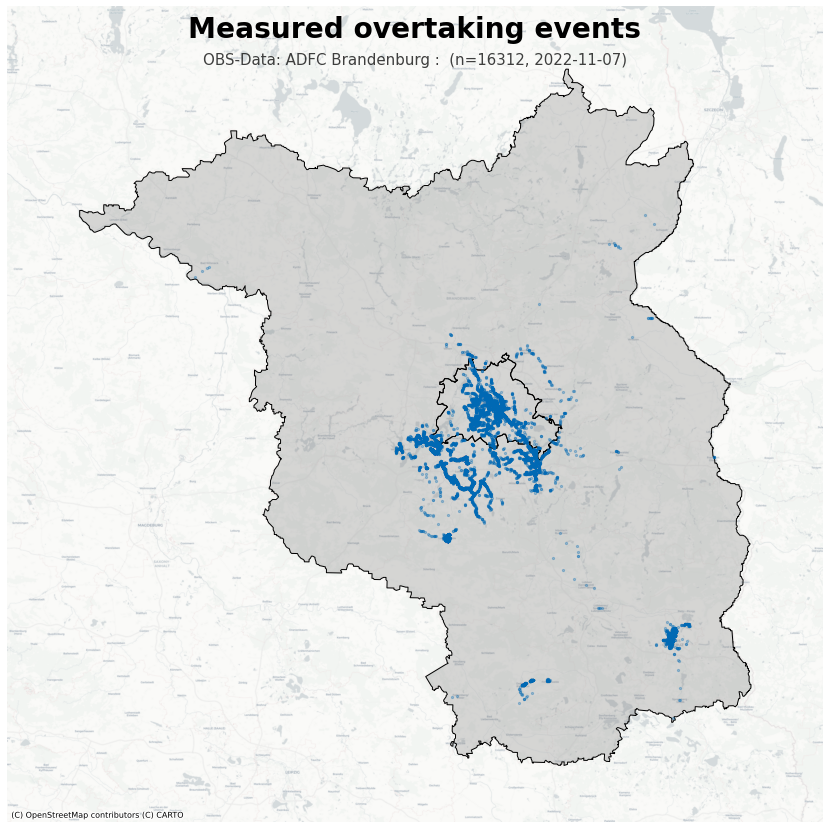

In [15]:
makeLayeredMap(bland[bland.name.isin(['Brandenburg','Berlin'])],gdf_clipped)

#### DEUTSCHLAND

In [16]:


# Function
def makeLayeredMap(*args):
    """This function accepts an arbitrary number of geodataframes, plots them on top of a Contextily basemap. 
    NOTE: Please edit the Plotting-section to specify parameters for the number of layers and the formatting of each layer.
    Output: Saved file and layered map for display."""
    
    # Convert the CRS for all layers to EPSG3857 to match Contextily
    args = list(map(lambda x: x.to_crs(epsg=3857), args))
    # Create figure
    fig, ax = plt.subplots(1, figsize=(15, 15))
    #Set aspect to equal
    ax.set_aspect('equal')
    
    # PLOTTING: Specify layers to plot how to format each layer (colours, transparency, etc.):
    # Layer 1:
    args[0].plot(ax=ax,facecolor="grey", alpha=0.3, figsize=(15,15))
    args[0].plot(ax=ax,facecolor="none", alpha=1, edgecolor='black', linewidths=1, figsize=(15,15))
    # Layer 2:
    args[1].plot(ax=ax, color='#0069B4', alpha=0.3, zorder=2, markersize=5)

    
    # Contextily basemap:
    #ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron) 
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, reset_extent=False, zoom = 10) 

    # Turn off axis
    ax.axis('off')
    
    ax.text(x=0.5, y=0.955, s='Measured overtaking events', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
    ax.text(x=0.5, y=0.92, s="OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, \n  ADFC Darmstadt, ADFC Osnabrück: (n=" + str(len(args[1])) + ", 2022-11-07)", fontsize=13, alpha=0.85, ha='center', va='bottom', transform=ax.transAxes)
    layered_map = plt.show()
    
    #fig.savefig("plots\OBS_analysis_map_Deutschland_80dpi.png", dpi=80) 
    return(layered_map)

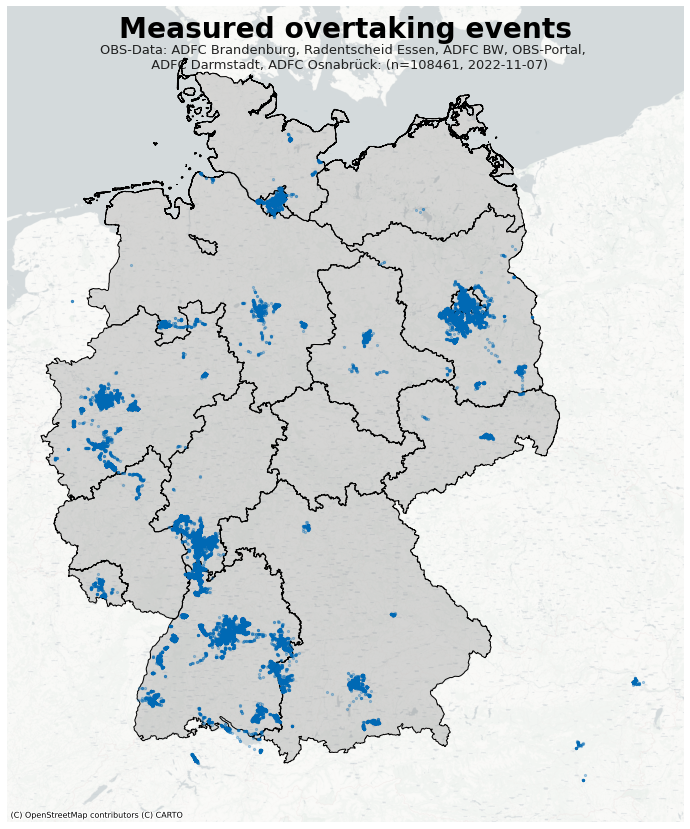

In [17]:
makeLayeredMap(bland,gdf)

---
<a id="pre">pre processing<a> 


In [18]:
# from m in cm
gdf['distance_overtaker']=gdf['distance_overtaker']*100
gdf['distance_stationary']=gdf['distance_stationary']*100

In [19]:
#adding bins of distance_overtaker

#50cm
bins = [0,50,100,150,200,250,400]
labels = ['<50','50-100','100-150','150-200','200-250','>250']
gdf['distance_overtaker_binned'] = pd.cut(gdf['distance_overtaker'], bins=bins, labels=labels)

#25cm
bins = list(range(0,260,25))
bins.append(400)
labels = ['<25','25-50','50-75','75-100','100-125','125-150','150-175','175-200','200-225','225-250','>250']
gdf['distance_overtaker_binned_25'] = pd.cut(gdf['distance_overtaker'], bins=bins, labels=labels)

In [20]:
# remove all datapoints with meassuerements below 15cm to clean wrong messurements due to ultrasonic sensor issues
gdf=gdf[~(gdf.distance_overtaker<15)&~(gdf.distance_stationary<15)].copy()

---
<a id="histo">plot histogram<a> 

In [21]:
histo_bbb=gdf[gdf.portal=='bbb'].groupby('distance_overtaker_binned_25')['distance_overtaker'].count().reset_index().rename(columns={'distance_overtaker':'counts'})
histo_bbb

,distance_overtaker_binned_25,counts
0,<25,20
1,25-50,122
2,50-75,446
3,75-100,1262
4,100-125,2364
5,125-150,3272
6,150-175,2959
7,175-200,2082
8,200-225,1419
9,225-250,725


Text(0.5, 1.1, 'OBS-Data: ADFC Brandenburg (n=15073, 2022-11-07)')

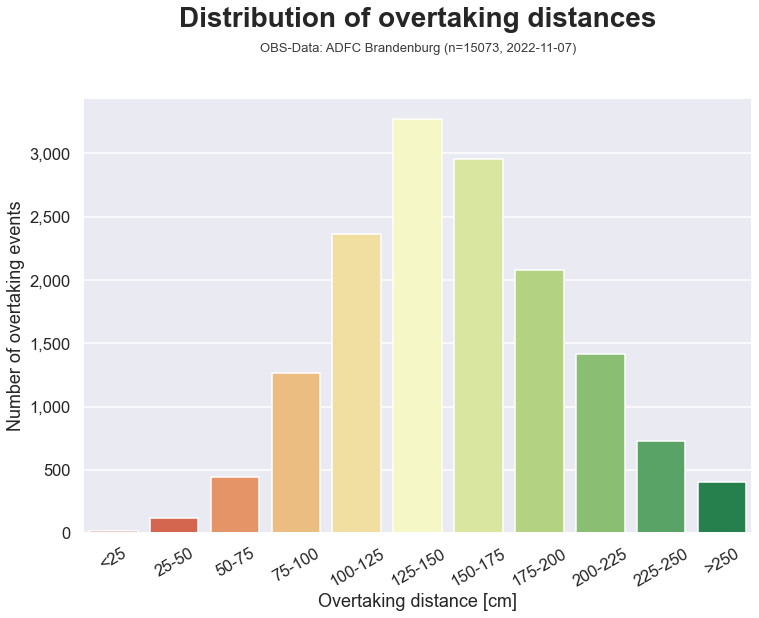

In [22]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_context("talk")

x_ax='distance_overtaker_binned_25'

fig, ax =plt.subplots(
                      figsize=(12,8),
                     )

### add boxplot left
ax1= sns.barplot(
    data=histo_bbb, x=x_ax, y='counts',
    hue=x_ax,
    palette='RdYlGn',# palette='Spectral',
    dodge=False,
    ax=ax)

ax1.set_ylabel('Number of overtaking events')
ax1.set_xlabel('Overtaking distance [cm]')

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x) ))

ax1.legend_.remove()

ax.set_xticklabels(ax1.get_xmajorticklabels(), rotation=30)

ax.text(x=0.5, y=1.15, s='Distribution of overtaking distances', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.07, s="OBS-Data: ADFC Brandenburg:  (n=" + str(counts.sum())+')', fontsize=9, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.10, s="OBS-Data: ADFC Brandenburg (n=" + str(histo_bbb.counts.sum())+', 2022-11-07)', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)

#fig.savefig("plots/OBS_analysis_distribution_bbb.png", dpi=300, bbox_inches="tight") 

In [23]:
histo_all=gdf.groupby('distance_overtaker_binned_25')['distance_overtaker'].count().reset_index().rename(columns={'distance_overtaker':'counts'})
histo_all

,distance_overtaker_binned_25,counts
0,<25,193
1,25-50,1146
2,50-75,3609
3,75-100,9515
4,100-125,17627
5,125-150,22879
6,150-175,20069
7,175-200,13884
8,200-225,8544
9,225-250,4350


Text(0.5, 1.08, 'OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, \n  ADFC Darmstadt, ADFC Osnabrück: (n=104406, 2022-11-07)')

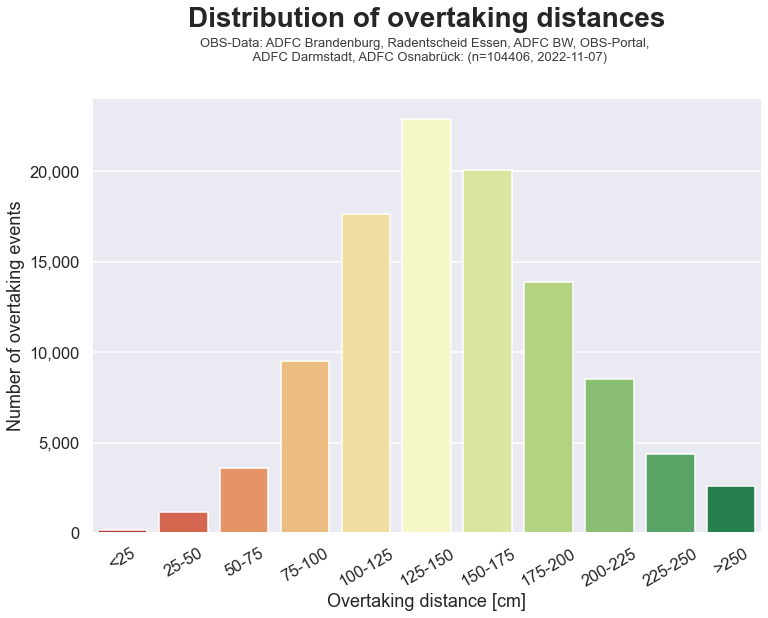

In [24]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_context("talk")

x_ax='distance_overtaker_binned_25'

fig, ax =plt.subplots(
                      figsize=(12,8),
                     )

### add boxplot left
ax1= sns.barplot(
    data=histo_all, x=x_ax, y='counts',
    hue=x_ax,
    palette='RdYlGn',# palette='Spectral',
    dodge=False,
    ax=ax)

ax1.set_ylabel('Number of overtaking events')
ax1.set_xlabel('Overtaking distance [cm]')

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x) ))

ax1.legend_.remove()

ax.set_xticklabels(ax1.get_xmajorticklabels(), rotation=30)

ax.text(x=0.5, y=1.15, s='Distribution of overtaking distances', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.07, s="OBS-Data: ADFC Brandenburg:  (n=" + str(counts.sum())+')', fontsize=9, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.08, s="OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, \n  ADFC Darmstadt, ADFC Osnabrück: (n=" + str(histo_all.counts.sum())+', 2022-11-07)', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)

#fig.savefig("plots/OBS_analysis_distribution_bbb.png", dpi=300, bbox_inches="tight") 

---
<a id="time">plot time based analysis<a> 

#### by month

In [25]:
gdf['month'] = gdf['time'].dt.month.astype(str)
gdf['year'] = gdf['time'].dt.year.astype(str)

In [26]:
gdf['year_month'] = gdf['year'] + "_" + gdf['month']

<AxesSubplot:xlabel='year,month'>

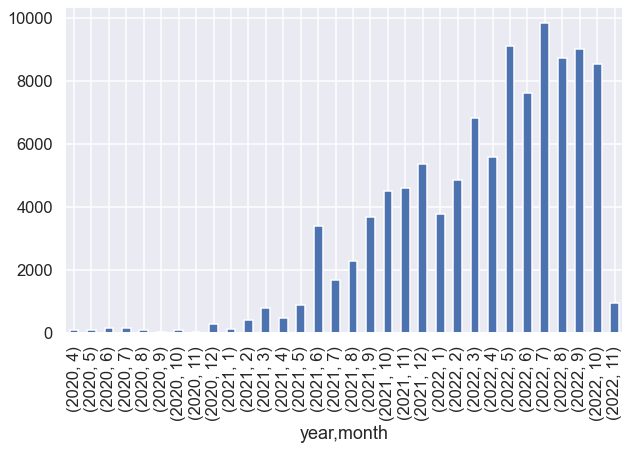

In [27]:
gdf['month'] = gdf['time'].dt.month.astype(int)
gdf.groupby(['year','month'])['distance_overtaker'].count().plot(kind='bar')

<AxesSubplot:xlabel='month'>

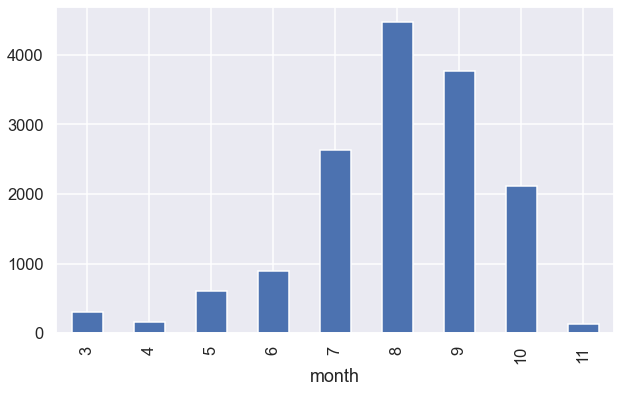

In [28]:
gdf['month'] = gdf['time'].dt.month.astype(int)
gdf[gdf.portal=='bbb'].groupby(['month'])['distance_overtaker'].count().plot(kind='bar')

Text(0.5, 1.1, 'OBS-Data: ADFC Brandenburg (n=15205, 2022-11-07)')

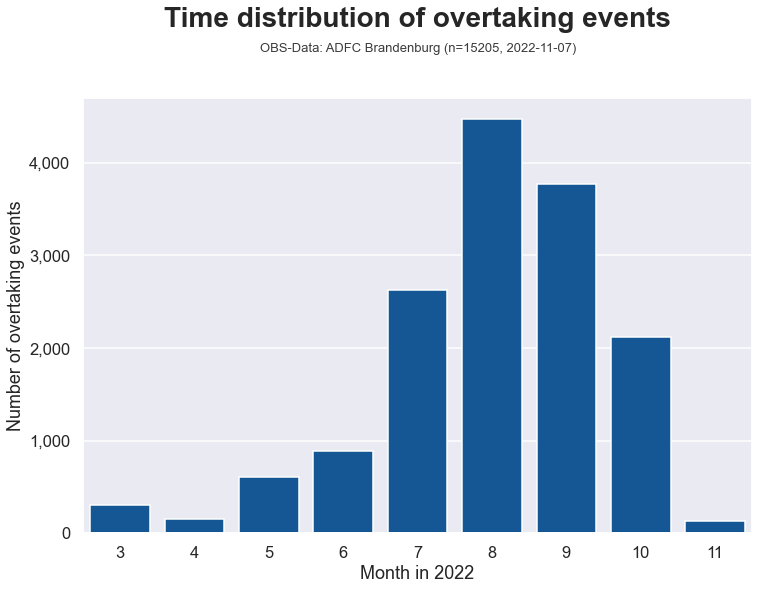

In [29]:
#sns.set(rc={'figure.figsize':(10,6)})
sns.set_context("talk")

gdf['month'] = gdf['time'].dt.month.astype(str)
data_c_plot=gdf[gdf.portal=='bbb']

data_c_plot=data_c_plot.groupby(['month'])['distance_overtaker'].count().reset_index().rename(columns={'distance_overtaker':'counts'})

x_ax='month'

x_ax_ordered_str=data_c_plot[x_ax].unique()
x_ax_ordered_str = [ '3', '4', '5', '6', '7', '8', '9','10', '11']

fig, ax =plt.subplots(
                      figsize=(12,8),
                     )


ax1= sns.barplot(
    data=data_c_plot, x=x_ax, y='counts',
    color='#0058A9',
    dodge=False,
    order = x_ax_ordered_str,
    ax=ax)



ax1.set_ylabel('Number of overtaking events')
ax1.set_xlabel('Month in 2022')

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x) ))

ax.text(x=0.5, y=1.15, s='Time distribution of overtaking events', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.10, s="OBS-Data: ADFC Brandenburg (n=" + str(len(gdf[gdf.portal=='bbb']))+', 2022-11-07)', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)

#fig.savefig("plots/OBS_analysis_distribution_time_bbb.png", dpi=300, bbox_inches="tight") 


Text(0.5, 1.08, 'OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, \n  ADFC Darmstadt, ADFC Osnabrück: (n=104406, 2022-11-07)')

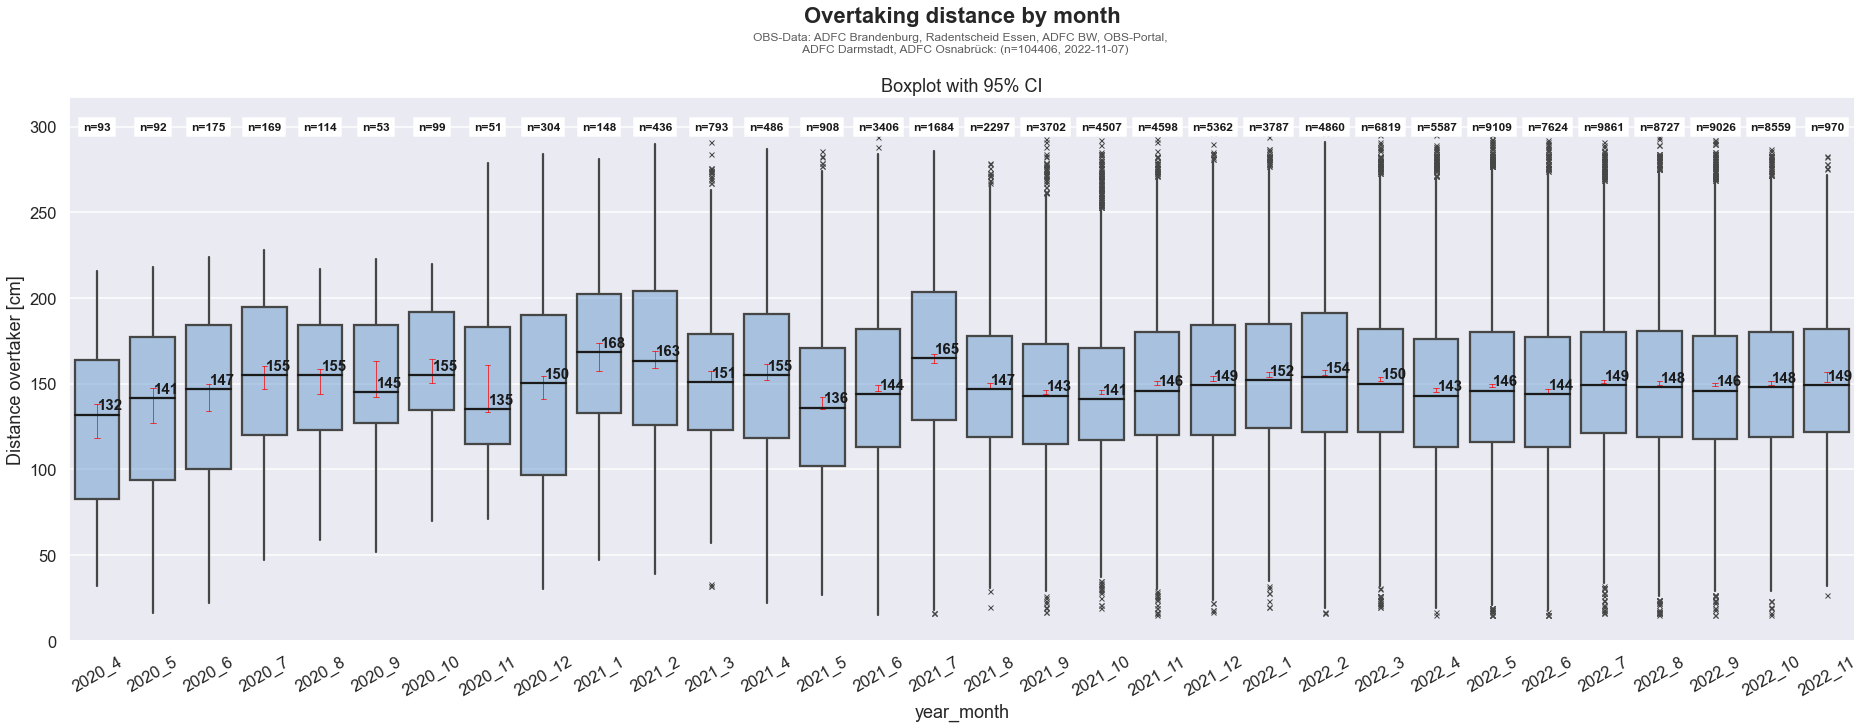

In [30]:

data_c_plot=gdf

for col in data_c_plot.dtypes.loc[lambda x: x == 'category'].index:
    data_c_plot[col] = data_c_plot[col].cat.remove_unused_categories()
    
x_ax='year_month'
x_ax_ordered_str=data_c_plot[x_ax].unique()
x_ax_ordered_str = ['2020_4', '2020_5', '2020_6', '2020_7', '2020_8', '2020_9',
       '2020_10', '2020_11', '2020_12', '2021_1', '2021_2', '2021_3',
       '2021_4', '2021_5', '2021_6', '2021_7', '2021_8', '2021_9',
       '2021_10', '2021_11', '2021_12', '2022_1', '2022_2', '2022_3',
       '2022_4', '2022_5', '2022_6', '2022_7', '2022_8', '2022_9',
       '2022_10', '2022_11']

fig, ax =plt.subplots(
                      figsize=(32,10),
                     )

### add boxplot left
ax1= sns.boxplot(
    data=data_c_plot, x=x_ax, y="distance_overtaker",
    showcaps=False,
    flierprops={"marker": "x"},
    order = x_ax_ordered_str,
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "k"},
    ax=ax)

### add labels to ax1
# medians
medians = data_c_plot.groupby([x_ax])['distance_overtaker'].median()
medians=medians.reindex(x_ax_ordered_str)
vertical_offset = data_c_plot['distance_overtaker'].median() * 0.02 # offset from median for display

for xtick in ax1.get_xticks():
    ax1.text(xtick+0.25,medians[xtick] + vertical_offset, int(medians[xtick]), 
            horizontalalignment='center',
             size='small',
             color='k',
             weight='semibold')
    
# counts on top   
counts = data_c_plot.groupby([x_ax])['distance_overtaker'].count()#.astype(int)
counts=counts.reindex(x_ax_ordered_str)
#vertical_offset = 0.99 # offset from median for display

for xtick in ax1.get_xticks():
    ax1.text(xtick,298,"n=" +str(counts[xtick]), 
            horizontalalignment='center',
             size='12',
             color='k',
             weight='semibold',
            bbox=dict(facecolor='w'))


### add boxplot right
ax2= sns.barplot( 
    data=data_c_plot, x=x_ax, y="distance_overtaker",
    #palette="Blues", 
    order = x_ax_ordered_str,
    alpha=0.0,
    capsize=.1, n_boot=1000, ci=95,
        errcolor= 'red', #errcolor='.26' =
    errwidth=0.7, 
    ax=ax)



ax.set_xticklabels(ax1.get_xmajorticklabels(), rotation=30)
#ax.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)

ax1.set(title='Boxplot with 95% CI')
ax1.set_ylabel('Distance overtaker [cm]')
ax1.set_xlabel('year_month')

#add overall title
ax.text(x=0.5, y=1.13, s='Overtaking distance by month', fontsize=22, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.08, s="OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, \n  ADFC Darmstadt, ADFC Osnabrück: (n=" + str(counts.sum())+', 2022-11-07)', fontsize=12, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

#fig.show()
#fig.savefig("OBS_analysis_osm_maxspeed_boxplot.png", dpi=300)

Text(0.5, 1.08, 'OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, \n  ADFC Darmstadt, ADFC Osnabrück: (n=104406, 2022-11-07)')

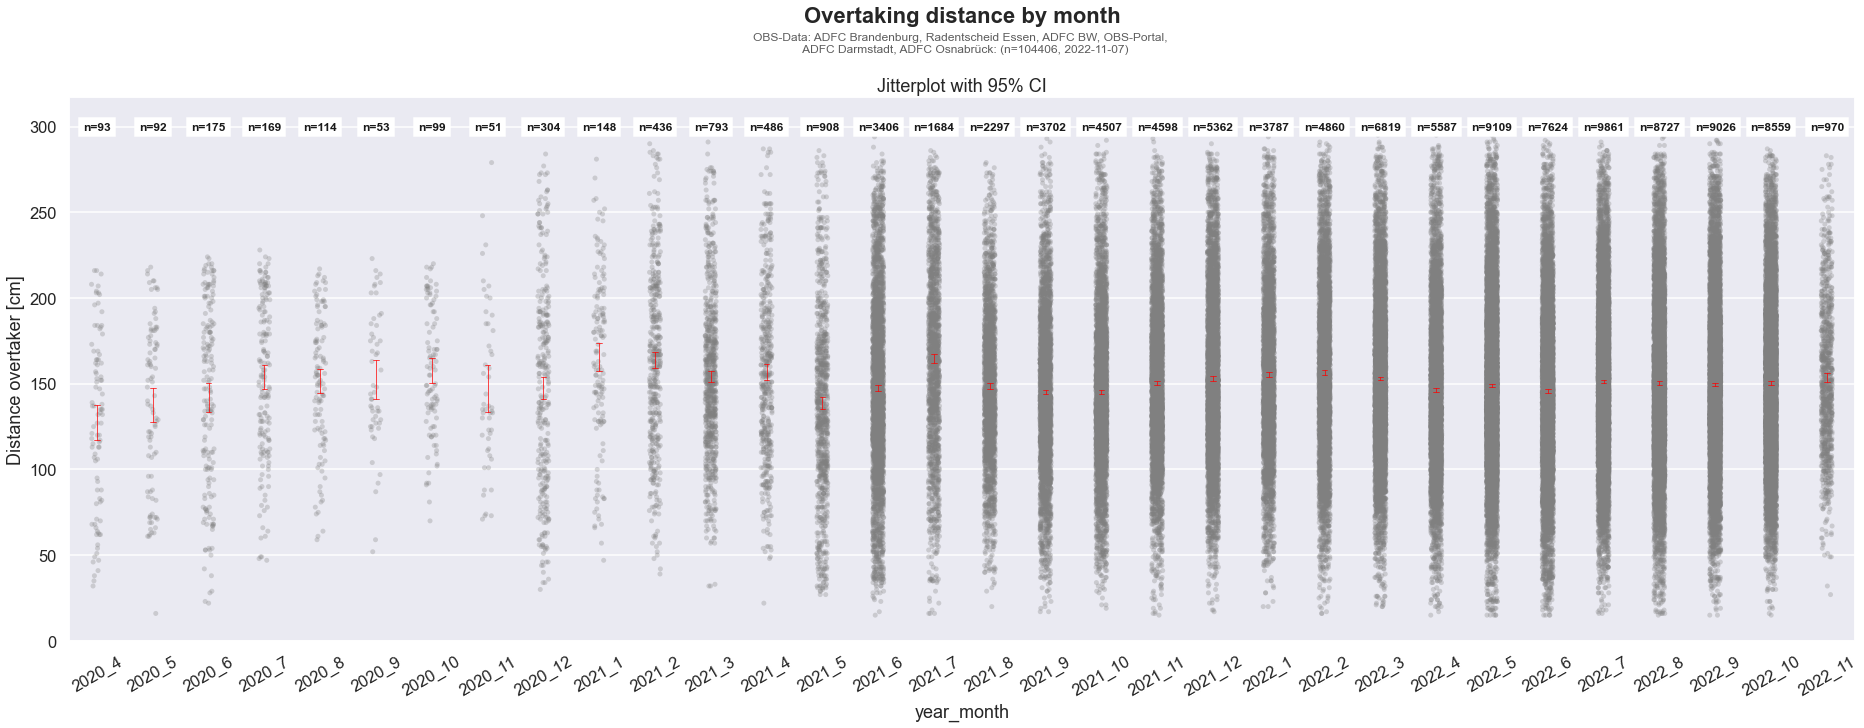

In [31]:


data_c_plot=gdf

for col in data_c_plot.dtypes.loc[lambda x: x == 'category'].index:
    data_c_plot[col] = data_c_plot[col].cat.remove_unused_categories()
    
x_ax='year_month'
#x_ax_ordered_str=data_c_plot[x_ax].unique()
x_ax_ordered_str = ['2020_4', '2020_5', '2020_6', '2020_7', '2020_8', '2020_9',
       '2020_10', '2020_11', '2020_12', '2021_1', '2021_2', '2021_3',
       '2021_4', '2021_5', '2021_6', '2021_7', '2021_8', '2021_9',
       '2021_10', '2021_11', '2021_12', '2022_1', '2022_2', '2022_3',
       '2022_4', '2022_5', '2022_6', '2022_7', '2022_8', '2022_9',
       '2022_10', '2022_11']

fig, ax =plt.subplots(
                      figsize=(32,10),
                     )

#### add boxplot left
#ax1= sns.boxplot(
#    data=data_c_plot, x=x_ax, y="distance_overtaker",
#    showcaps=False,
#    flierprops={"marker": "x"},
#    order = x_ax_ordered_str,
#    boxprops={"facecolor": (.4, .6, .8, .5)},
#    medianprops={"color": "k"},
#    ax=ax)

ax3 = sns.stripplot(data=data_c_plot, x=x_ax, y="distance_overtaker", order=x_ax_ordered_str,color="grey", alpha=0.3, ax=ax, zorder=1)


### add labels to ax1

    
# counts on top   
counts = data_c_plot.groupby([x_ax])['distance_overtaker'].count()#.astype(int)
counts=counts.reindex(x_ax_ordered_str)
#vertical_offset = 0.99 # offset from median for display

for xtick in ax3.get_xticks():
    ax3.text(xtick,298,"n=" +str(counts[xtick]), 
            horizontalalignment='center',
             size='12',
             color='k',
             weight='semibold',
            bbox=dict(facecolor='w'))


### add boxplot right
ax2= sns.barplot( 
    data=data_c_plot, x=x_ax, y="distance_overtaker",
    #palette="Blues", 
    order = x_ax_ordered_str,
    alpha=0.0,
    capsize=.1, n_boot=1000, ci=95,
        errcolor= 'red', #errcolor='.26' =
    errwidth=0.7, 
    ax=ax)




ax.set_xticklabels(ax1.get_xmajorticklabels(), rotation=30)
#ax.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)

ax.set(title='Jitterplot with 95% CI')
ax.set_ylabel('Distance overtaker [cm]')
ax.set_xlabel('year_month')

#add overall title
ax.text(x=0.5, y=1.13, s='Overtaking distance by month', fontsize=22, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.08, s="OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, \n  ADFC Darmstadt, ADFC Osnabrück: (n=" + str(counts.sum())+', 2022-11-07)', fontsize=12, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

#fig.show()
#fig.savefig("OBS_analysis_osm_maxspeed_boxplot.png", dpi=300)

#### by hour

In [32]:
gdf

,distance_overtaker,distance_stationary,direction,way_id,course,speed,time,geometry,portal,distance_overtaker_binned,distance_overtaker_binned_25,month,year,year_month
0,182.0,NaN,-1,28496022.0,1.913791,4.611111,2022-05-09 15:22:33+00:00,POINT (13.42786 52.47392),bbb,150-200,175-200,5,2022,2022_5
1,71.0,NaN,-1,28496022.0,1.927347,1.666667,2022-05-09 15:22:48+00:00,POINT (13.42766 52.47430),bbb,50-100,50-75,5,2022,2022_5
2,157.0,50.0,-1,849599088.0,1.934648,4.500000,2022-05-09 15:23:26+00:00,POINT (13.42738 52.47485),bbb,150-200,150-175,5,2022,2022_5
3,126.0,74.0,-1,568336446.0,1.878984,4.138889,2022-05-09 15:23:33+00:00,POINT (13.42746 52.47528),bbb,100-150,125-150,5,2022,2022_5
4,205.0,NaN,-1,816236476.0,2.021442,4.083333,2022-05-09 15:23:44+00:00,POINT (13.42769 52.47581),bbb,200-250,200-225,5,2022,2022_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,129.0,241.0,1,93245513.0,0.794396,3.916667,2022-11-01 05:42:58+00:00,POINT (8.00970 52.26666),os,100-150,125-150,11,2022,2022_11
2103,169.0,NaN,1,93245513.0,0.721962,2.361111,2022-11-01 05:43:05+00:00,POINT (8.01000 52.26678),os,150-200,150-175,11,2022,2022_11
2104,139.0,NaN,1,93245513.0,0.536645,2.138889,2022-11-01 05:43:08+00:00,POINT (8.01010 52.26682),os,100-150,125-150,11,2022,2022_11
2105,152.0,NaN,1,93245513.0,0.930771,2.750000,2022-11-01 05:43:16+00:00,POINT (8.01051 52.26698),os,150-200,150-175,11,2022,2022_11


In [33]:
# add local time
gdf['time_berlin']=gdf['time'].dt.tz_convert('Europe/Berlin')

<AxesSubplot:title={'center':'Brandenburg'}, xlabel='hour'>

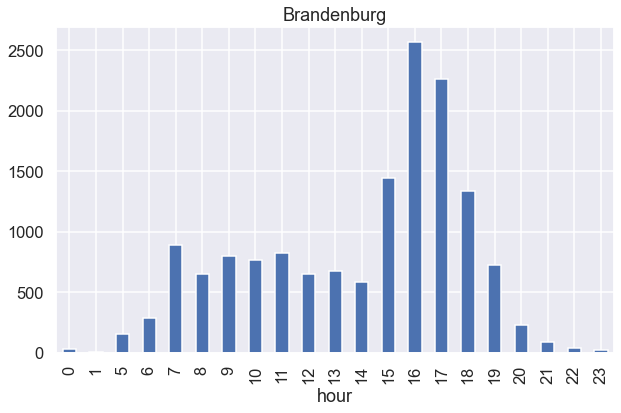

In [34]:
gdf['hour'] = gdf['time_berlin'].dt.hour.astype(int)
gdf[gdf.portal=='bbb'].groupby(['hour'])['distance_overtaker'].count().plot(kind='bar', title='Brandenburg')

<AxesSubplot:title={'center':'Deutschland'}, xlabel='hour'>

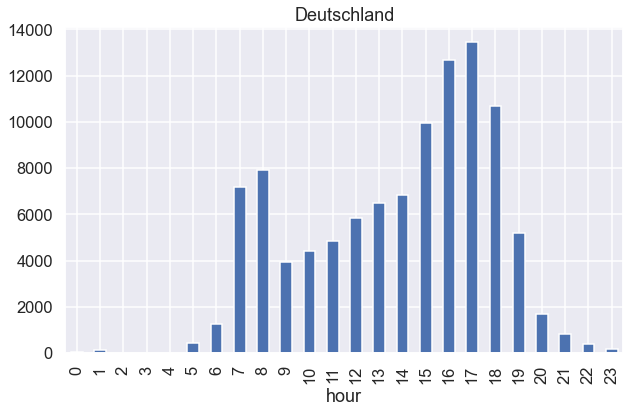

In [35]:
gdf.groupby(['hour'])['distance_overtaker'].count().plot(kind='bar', title='Deutschland')

Text(0.5, 1.08, 'OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, \n  ADFC Darmstadt, ADFC Osnabrück: (n=104406, 2022-11-07)')

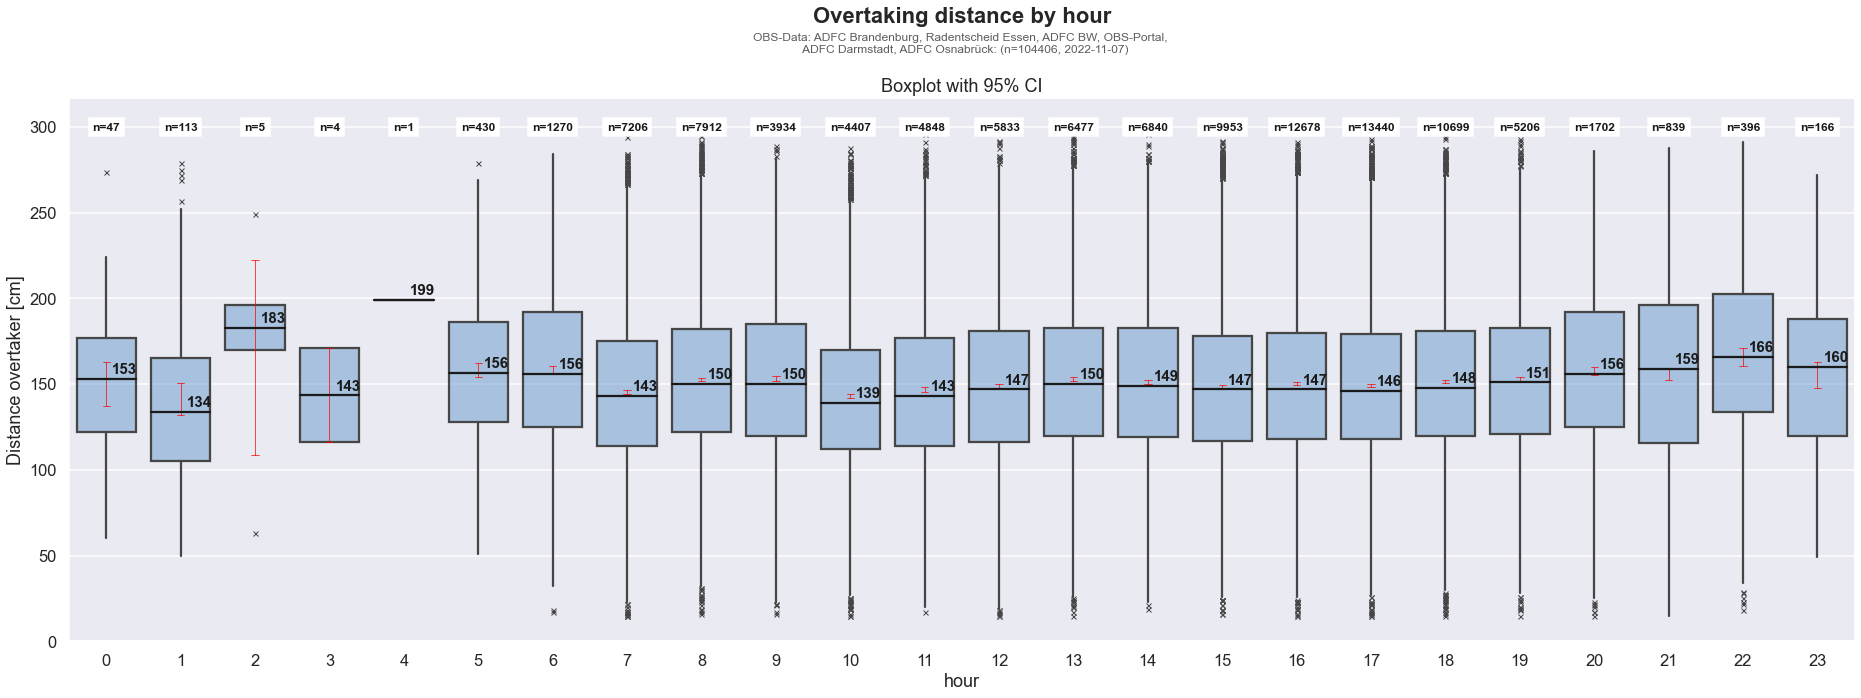

In [36]:

data_c_plot=gdf

for col in data_c_plot.dtypes.loc[lambda x: x == 'category'].index:
    data_c_plot[col] = data_c_plot[col].cat.remove_unused_categories()
    
x_ax='hour'
x_ax_ordered_str=data_c_plot[x_ax].unique()
x_ax_ordered_str.sort()

fig, ax =plt.subplots(
                      figsize=(32,10),
                     )

### add boxplot left
ax1= sns.boxplot(
    data=data_c_plot, x=x_ax, y="distance_overtaker",
    showcaps=False,
    flierprops={"marker": "x"},
    order = x_ax_ordered_str,
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "k"},
    ax=ax)

### add labels to ax1
# medians
medians = data_c_plot.groupby([x_ax])['distance_overtaker'].median()
medians=medians.reindex(x_ax_ordered_str)
vertical_offset = data_c_plot['distance_overtaker'].median() * 0.02 # offset from median for display

for xtick in ax1.get_xticks():
    ax1.text(xtick+0.25,medians[xtick] + vertical_offset, int(medians[xtick]), 
            horizontalalignment='center',
             size='small',
             color='k',
             weight='semibold')
    
# counts on top   
counts = data_c_plot.groupby([x_ax])['distance_overtaker'].count()#.astype(int)
counts=counts.reindex(x_ax_ordered_str)
#vertical_offset = 0.99 # offset from median for display

for xtick in ax1.get_xticks():
    ax1.text(xtick,298,"n=" +str(counts[xtick]), 
            horizontalalignment='center',
             size='12',
             color='k',
             weight='semibold',
            bbox=dict(facecolor='w'))


### add boxplot right
ax2= sns.barplot( 
    data=data_c_plot, x=x_ax, y="distance_overtaker",
    #palette="Blues", 
    order = x_ax_ordered_str,
    alpha=0.0,
    capsize=.1, n_boot=1000, ci=95,
        errcolor= 'red', #errcolor='.26' =
    errwidth=0.7, 
    ax=ax)



#ax.set_xticklabels(ax1.get_xmajorticklabels(), rotation=30)
#ax.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)

ax1.set(title='Boxplot with 95% CI')
ax1.set_ylabel('Distance overtaker [cm]')
ax1.set_xlabel('hour')

#add overall title
ax.text(x=0.5, y=1.13, s='Overtaking distance by hour', fontsize=22, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.08, s="OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, \n  ADFC Darmstadt, ADFC Osnabrück: (n=" + str(counts.sum())+', 2022-11-07)', fontsize=12, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

#fig.show()
#fig.savefig("OBS_analysis_osm_maxspeed_boxplot.png", dpi=300)

Text(0.5, 1.08, 'OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, \n  ADFC Darmstadt, ADFC Osnabrück: (n=104406, 2022-11-07)')

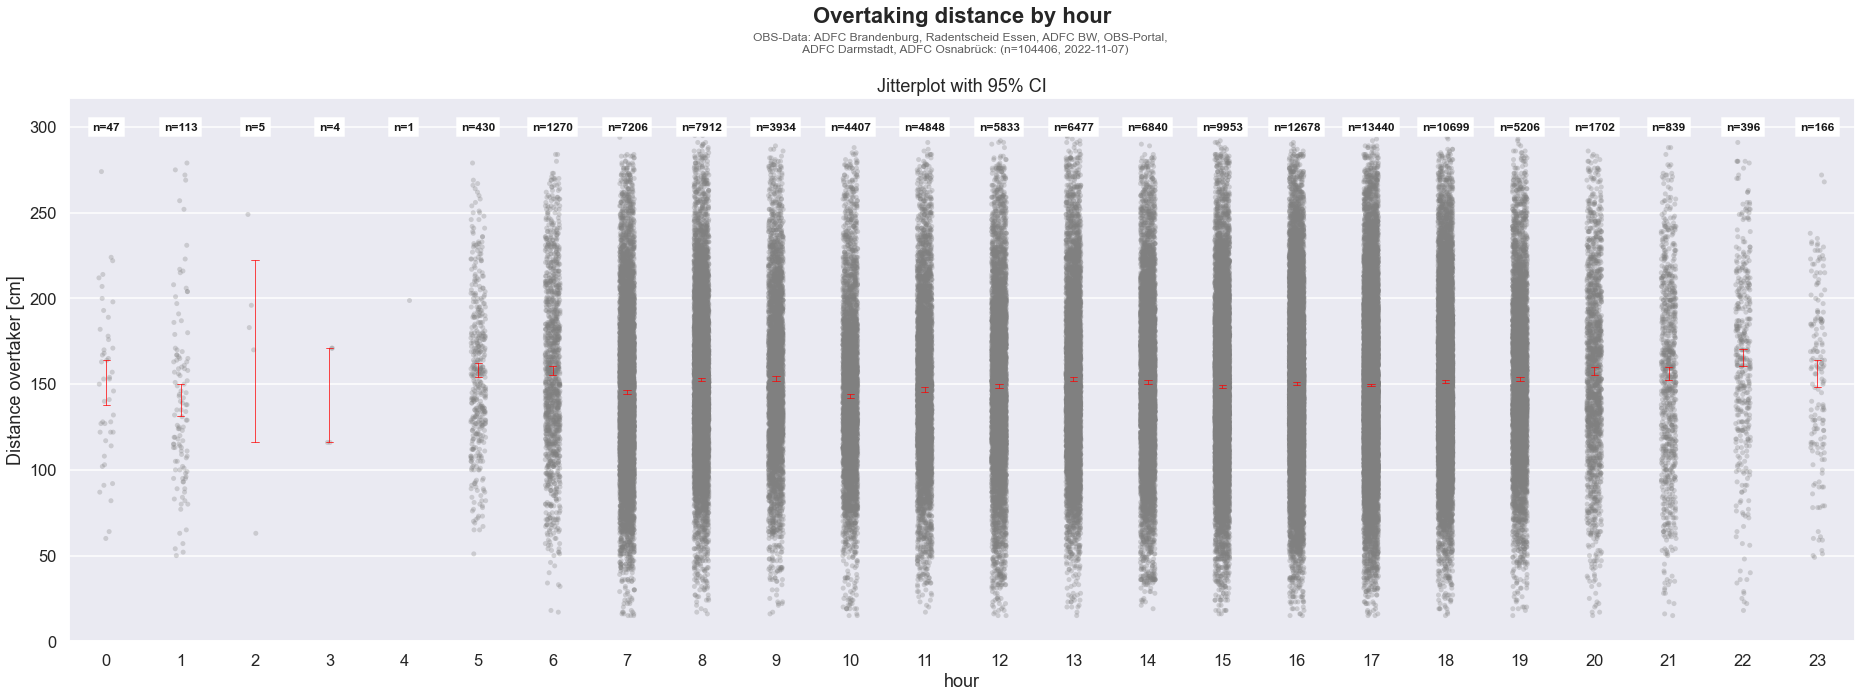

In [37]:


data_c_plot=gdf

for col in data_c_plot.dtypes.loc[lambda x: x == 'category'].index:
    data_c_plot[col] = data_c_plot[col].cat.remove_unused_categories()
    
x_ax='hour'
x_ax_ordered_str=data_c_plot[x_ax].unique()
x_ax_ordered_str.sort()

fig, ax =plt.subplots(
                      figsize=(32,10),
                     )

#### add boxplot left
#ax1= sns.boxplot(
#    data=data_c_plot, x=x_ax, y="distance_overtaker",
#    showcaps=False,
#    flierprops={"marker": "x"},
#    order = x_ax_ordered_str,
#    boxprops={"facecolor": (.4, .6, .8, .5)},
#    medianprops={"color": "k"},
#    ax=ax)

ax3 = sns.stripplot(data=data_c_plot, x=x_ax, y="distance_overtaker",color="grey", alpha=0.3, ax=ax, zorder=1)


### add labels to ax1

    
# counts on top   
counts = data_c_plot.groupby([x_ax])['distance_overtaker'].count()#.astype(int)
counts=counts.reindex(x_ax_ordered_str)
#vertical_offset = 0.99 # offset from median for display

for xtick in ax3.get_xticks():
    ax3.text(xtick,298,"n=" +str(counts[xtick]), 
            horizontalalignment='center',
             size='12',
             color='k',
             weight='semibold',
            bbox=dict(facecolor='w'))


### add boxplot right
ax2= sns.barplot( 
    data=data_c_plot, x=x_ax, y="distance_overtaker",
    #palette="Blues", 
    order = x_ax_ordered_str,
    alpha=0.0,
    capsize=.1, n_boot=1000, ci=95,
        errcolor= 'red', #errcolor='.26' =
    errwidth=0.7, 
    ax=ax)




#ax.set_xticklabels(ax1.get_xmajorticklabels(), rotation=30)
#ax.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)

ax.set(title='Jitterplot with 95% CI')
ax.set_ylabel('Distance overtaker [cm]')
ax.set_xlabel('hour')

#add overall title
ax.text(x=0.5, y=1.13, s='Overtaking distance by hour', fontsize=22, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.08, s="OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, \n  ADFC Darmstadt, ADFC Osnabrück: (n=" + str(counts.sum())+', 2022-11-07)', fontsize=12, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

#fig.show()
#fig.savefig("OBS_analysis_osm_maxspeed_boxplot.png", dpi=300)

### by weekday

<AxesSubplot:title={'center':'Brandenburg'}, xlabel='weekday'>

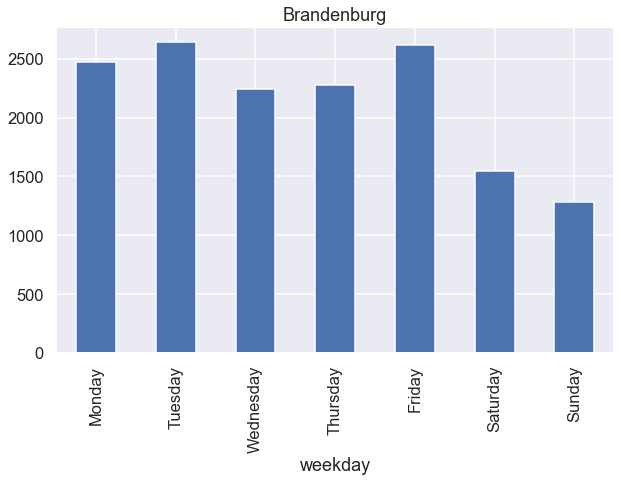

In [38]:
gdf['weekday'] = gdf['time_berlin'].dt.day_name()

def weekday_sorter(column):
    """Sort function"""
    order_wd=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    correspondence = {o: order for order, o in enumerate(order_wd)}
    return column.map(correspondence)

gdf[gdf.portal=='bbb'].groupby(['weekday'])['distance_overtaker'].count().reset_index().sort_values(by='weekday', key=weekday_sorter).plot(kind='bar', title='Brandenburg', x='weekday', legend=None)

<AxesSubplot:title={'center':'Brandenburg'}, xlabel='weekday'>

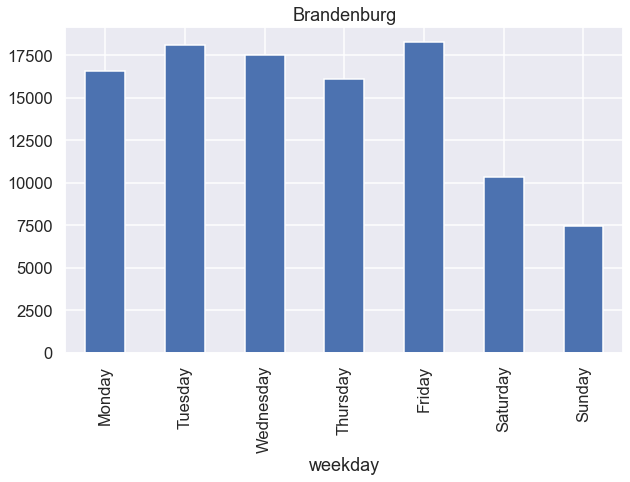

In [39]:
gdf['weekday'] = gdf['time_berlin'].dt.day_name()

def weekday_sorter(column):
    """Sort function"""
    order_wd=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    correspondence = {o: order for order, o in enumerate(order_wd)}
    return column.map(correspondence)

gdf.groupby(['weekday'])['distance_overtaker'].count().reset_index().sort_values(by='weekday', key=weekday_sorter).plot(kind='bar', title='Brandenburg', x='weekday', legend=None)

Text(0.5, 1.08, 'OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, \n  ADFC Darmstadt, ADFC Osnabrück: (n=104406, 2022-11-07)')

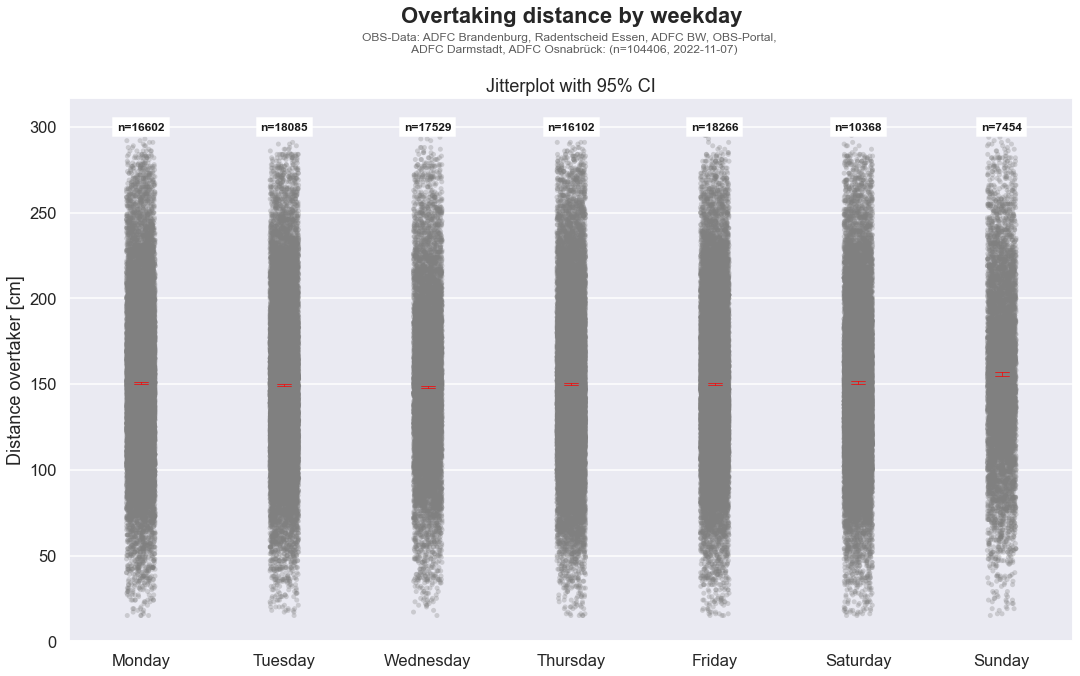

In [40]:


data_c_plot=gdf

for col in data_c_plot.dtypes.loc[lambda x: x == 'category'].index:
    data_c_plot[col] = data_c_plot[col].cat.remove_unused_categories()
    
x_ax='weekday'
x_ax_ordered_str=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']


fig, ax =plt.subplots(
                      figsize=(18,10),
                     )

#### add boxplot left
#ax1= sns.boxplot(
#    data=data_c_plot, x=x_ax, y="distance_overtaker",
#    showcaps=False,
#    flierprops={"marker": "x"},
#    order = x_ax_ordered_str,
#    boxprops={"facecolor": (.4, .6, .8, .5)},
#    medianprops={"color": "k"},
#    ax=ax)

ax3 = sns.stripplot(data=data_c_plot, x=x_ax, y="distance_overtaker",color="grey", alpha=0.3, ax=ax, zorder=1)


### add labels to ax1

    
# counts on top   
counts = data_c_plot.groupby([x_ax])['distance_overtaker'].count()#.astype(int)
counts=counts.reindex(x_ax_ordered_str)
#vertical_offset = 0.99 # offset from median for display

for xtick in ax3.get_xticks():
    ax3.text(xtick,298,"n=" +str(counts[xtick]), 
            horizontalalignment='center',
             size='12',
             color='k',
             weight='semibold',
            bbox=dict(facecolor='w'))


### add boxplot right
ax2= sns.barplot( 
    data=data_c_plot, x=x_ax, y="distance_overtaker",
    #palette="Blues", 
    order = x_ax_ordered_str,
    alpha=0.0,
    capsize=.1, n_boot=1000, ci=95,
        errcolor= 'red', #errcolor='.26' =
    errwidth=0.7, 
    ax=ax)




#ax.set_xticklabels(ax1.get_xmajorticklabels(), rotation=30)
#ax.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)

ax.set(title='Jitterplot with 95% CI')
ax.set_ylabel('Distance overtaker [cm]')
ax.set_xlabel('')

#add overall title
ax.text(x=0.5, y=1.13, s='Overtaking distance by weekday', fontsize=22, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.08, s="OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, \n  ADFC Darmstadt, ADFC Osnabrück: (n=" + str(counts.sum())+', 2022-11-07)', fontsize=12, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

#fig.show()
#fig.savefig("OBS_analysis_osm_maxspeed_boxplot.png", dpi=300)

Text(0.5, 1.08, 'OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, \n  ADFC Darmstadt, ADFC Osnabrück: (n=104406, 2022-11-07)')

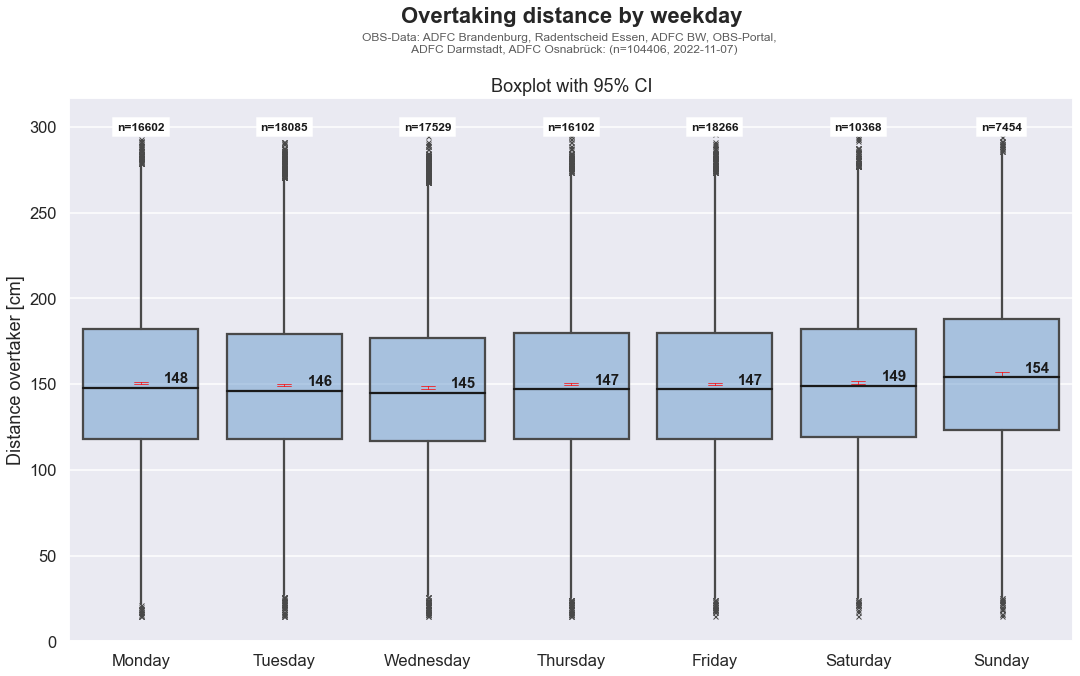

In [41]:

data_c_plot=gdf

for col in data_c_plot.dtypes.loc[lambda x: x == 'category'].index:
    data_c_plot[col] = data_c_plot[col].cat.remove_unused_categories()
    
x_ax='weekday'
x_ax_ordered_str=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig, ax =plt.subplots(
                      figsize=(18,10),
                     )

### add boxplot left
ax1= sns.boxplot(
    data=data_c_plot, x=x_ax, y="distance_overtaker",
    showcaps=False,
    flierprops={"marker": "x"},
    order = x_ax_ordered_str,
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "k"},
    ax=ax)

### add labels to ax1
# medians
medians = data_c_plot.groupby([x_ax])['distance_overtaker'].median()
medians=medians.reindex(x_ax_ordered_str)
vertical_offset = data_c_plot['distance_overtaker'].median() * 0.02 # offset from median for display

for xtick in ax1.get_xticks():
    ax1.text(xtick+0.25,medians[xtick] + vertical_offset, int(medians[xtick]), 
            horizontalalignment='center',
             size='small',
             color='k',
             weight='semibold')
    
# counts on top   
counts = data_c_plot.groupby([x_ax])['distance_overtaker'].count()#.astype(int)
counts=counts.reindex(x_ax_ordered_str)
#vertical_offset = 0.99 # offset from median for display

for xtick in ax1.get_xticks():
    ax1.text(xtick,298,"n=" +str(counts[xtick]), 
            horizontalalignment='center',
             size='12',
             color='k',
             weight='semibold',
            bbox=dict(facecolor='w'))


### add boxplot right
ax2= sns.barplot( 
    data=data_c_plot, x=x_ax, y="distance_overtaker",
    #palette="Blues", 
    order = x_ax_ordered_str,
    alpha=0.0,
    capsize=.1, n_boot=1000, ci=95,
        errcolor= 'red', #errcolor='.26' =
    errwidth=0.7, 
    ax=ax)



#ax.set_xticklabels(ax1.get_xmajorticklabels(), rotation=30)
#ax.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)

ax1.set(title='Boxplot with 95% CI')
ax1.set_ylabel('Distance overtaker [cm]')
ax1.set_xlabel('')

#add overall title
ax.text(x=0.5, y=1.13, s='Overtaking distance by weekday', fontsize=22, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.08, s="OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, \n  ADFC Darmstadt, ADFC Osnabrück: (n=" + str(counts.sum())+', 2022-11-07)', fontsize=12, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

#fig.show()
#fig.savefig("OBS_analysis_osm_maxspeed_boxplot.png", dpi=300)